2023.04.10 박진윤 선임연구원, 태안군 인공지능유합산업진흥원

## Visualize UTKinect Action public dataset

In [1]:
dataset_name = 'UTK'

In [10]:
ori_dir = './dataset/UTKinect_Action_3D/'
prcs_dir = f'./dataset/preprocess/{dataset_name}/'

## Library import

In [3]:
import matplotlib.pyplot
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
import os
import natsort
import imageio #pip install imageio
import cv2
import glob

import xml.etree.ElementTree as ET
# %matplotlib notebook

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-orargulg because the default path (/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [4]:
def createFolder(directory):
    try:
        if os.path.exists(directory):
            print('Already Exists')
        if not os.path.exists(directory):
            os.makedirs(directory)
            print('Sucess creating directory. -> ' + directory)
    except OSError:
        print ('Error: Creating directory.' +  directory)

## Assert data information
- 데이터 인텍스별로 해당되는 관절 인덱트
- motion class 이름 및 인덱스

In [5]:
bones_3d = [[3, 2, 2],
            [2, 1, 2],
            [1, 0, 2],
            [2, 4, 1],
            [4, 5, 1],
            [5, 6, 1],
            [6, 7, 1],
            [2, 8, 0],
            [8, 9, 0],
            [9, 10, 0],
            [10, 11, 0],
            [0, 12, 1],
            [12, 13, 1],
            [13, 14, 1],
            [14, 15, 1],
            [0, 16, 0],
            [16, 17, 0],
           [17, 18, 0],
           [18, 19, 0]] #0 == red/right, 1 == blue/left 2 == black/mid

In [35]:
activity = [[0, 'walk'],
           [1,'sitDown'],
           [2, 'standUp'],
           [3, 'pickUp'],
           [4, 'carry'],
           [5, 'throw'],
           [6, 'push'],
           [7, 'pull'],
           [8, 'waveHands'],
           [9, 'clapHands']]

## Check data format

In [11]:
#파일이름 적기
file_name = ori_dir + 'joints_s01_e01.txt' 
subject = file_name.split('/')[-1].split('.')[0]

데이터 구조 확인

In [12]:
data = np.loadtxt(file_name)
len(data[0]), len(data), data[0]

(61,
 560,
 array([ 1.900000e+02,  8.071390e-01, -6.342100e-02,  1.998671e+00,
         8.109860e-01, -5.124000e-03,  1.992173e+00,  8.302250e-01,
         2.863600e-01,  1.971896e+00,  7.808680e-01,  4.725910e-01,
         1.943852e+00,  7.112810e-01,  2.446800e-01,  2.097511e+00,
         7.208010e-01,  7.425900e-02,  2.167025e+00,  6.975250e-01,
        -1.089950e-01,  2.211390e+00,  6.620520e-01, -3.211550e-01,
         2.258805e+00,  9.194640e-01,  1.576610e-01,  1.898457e+00,
         9.623300e-01, -3.004400e-02,  1.876033e+00,  9.511300e-01,
        -2.222620e-01,  1.863633e+00,  9.343930e-01, -3.199350e-01,
         1.865732e+00,  7.558470e-01, -1.112790e-01,  2.046635e+00,
         7.798160e-01, -4.222010e-01,  2.109657e+00,  8.386850e-01,
        -7.916010e-01,  2.023041e+00,  7.987760e-01, -8.241710e-01,
         2.090308e+00,  8.495290e-01, -1.504370e-01,  1.957178e+00,
         7.993260e-01, -4.564590e-01,  2.124952e+00,  1.123163e+00,
        -6.714470e-01,  2.230690e+00,

시각화를 통해 기존의 데이터 확인

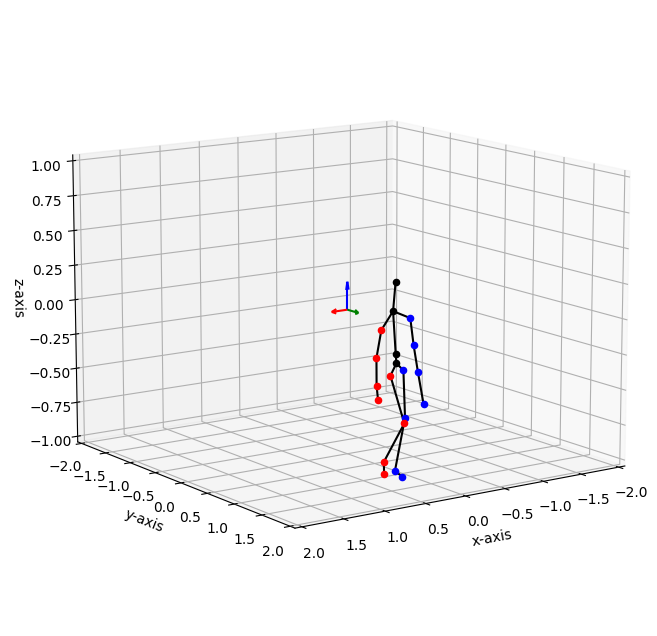

In [24]:
frame_idx = 0

# %matplotlib notebook

plt.ioff()
fig = plt.figure(figsize=(8,8))

elev= 12
azim = 55

ax = fig.add_subplot(projection='3d')
ax.view_init(elev,azim) #(elev = 위아래, azim = 좌우)
ax.set_xlim3d([-2, 2])
ax.set_ylim3d([-2, 2])
ax.set_zlim3d([-1, 1])

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

ax.quiver(0,0,0,0.2,0,0, color='r') #x-axis , label = 'x'
ax.quiver(0,0,0,0,0.2,0, color='g') #y-axis , label = 'y'
ax.quiver(0,0,0,0,0,0.2, color='b') #z-axis , label = 'z'

for bone in bones_3d:
    start = bone[0]
    end = bone[1]

    col = 'black' if bone[2] == 0 else 'black' #red = right, black = left

    x = [(data[frame_idx][start*3+1]), (data[frame_idx][end*3+1])]
    y = [(data[frame_idx][(start*3)+3]), (data[frame_idx][(end*3)+3])]
    z = [(data[frame_idx][(start*3)+2]), (data[frame_idx][(end*3)+2])]

    ax.plot(x, y, z, c = col)

for i in range(20):
    if i in [4,5,6,7,12,13,14,15]: col = 'blue'
    elif i in [0,1,2,3]: col = 'k'
    else: col = 'r'
    x = data[frame_idx][i*3+1]
    y = data[frame_idx][i*3+3]
    z = data[frame_idx][i*3+2]
    
    ax.scatter3D(x, y, z, c=col)

plt.show()

UTK dataset in from of x, z, y order

데이터셋 정보 확인 (subject, motion class, instances, etc)

In [25]:
file_name = ori_dir + 'actionLabel.txt' 

In [26]:
with open(file_name) as file:
    lines = file.readlines()
    data = [line.rstrip() for line in lines]

In [27]:
data

['s01_e01',
 'walk: 252 390',
 'sitDown: 572 686',
 'standUp: 704 752',
 'pickUp: 822 954',
 'carry: 1016 1242',
 'throw: 1434 1488',
 'push: 1686 1748',
 'pull: 1640 1686',
 'waveHands: 1834 2064',
 'clapHands: 2110 2228',
 's01_e02',
 'walk: 154 192',
 'sitDown: 530 628',
 'standUp: 640 720',
 'pickUp: 1202 1356',
 'carry: 1364 1520',
 'throw: 2246 2294',
 'push: 2752 2792',
 'pull: 2820 2858',
 'waveHands: 2984 3204',
 'clapHands: 3250 3448',
 's02_e01',
 'walk: 266 368',
 'sitDown: 672 788',
 'standUp: 818 910',
 'pickUp: 1262 1386',
 'carry: 1424 1780',
 'throw: 2040 2086',
 'push: 2340 2376',
 'pull: 2488 2550',
 'waveHands: 2668 2830',
 'clapHands: 3198 3324',
 's02_e02',
 'walk: 40 208',
 'sitDown: 468 602',
 'standUp: 620 722',
 'pickUp: 894 1038',
 'carry: 1340 1480',
 'throw: 1966 2014',
 'push: 2194 2230',
 'pull: 2314 2358',
 'waveHands: 2408 2630',
 'clapHands: 2690 2810',
 's03_e01',
 'walk: 372 528',
 'sitDown: 734 862',
 'standUp: 902 1000',
 'pickUp: 1118 1284',
 'car

In [28]:
data[0].split()

['s01_e01']

In [29]:
data_info = []
for i in range(len(data)):
    data_info.append(data[i].split())

In [30]:
data_info

[['s01_e01'],
 ['walk:', '252', '390'],
 ['sitDown:', '572', '686'],
 ['standUp:', '704', '752'],
 ['pickUp:', '822', '954'],
 ['carry:', '1016', '1242'],
 ['throw:', '1434', '1488'],
 ['push:', '1686', '1748'],
 ['pull:', '1640', '1686'],
 ['waveHands:', '1834', '2064'],
 ['clapHands:', '2110', '2228'],
 ['s01_e02'],
 ['walk:', '154', '192'],
 ['sitDown:', '530', '628'],
 ['standUp:', '640', '720'],
 ['pickUp:', '1202', '1356'],
 ['carry:', '1364', '1520'],
 ['throw:', '2246', '2294'],
 ['push:', '2752', '2792'],
 ['pull:', '2820', '2858'],
 ['waveHands:', '2984', '3204'],
 ['clapHands:', '3250', '3448'],
 ['s02_e01'],
 ['walk:', '266', '368'],
 ['sitDown:', '672', '788'],
 ['standUp:', '818', '910'],
 ['pickUp:', '1262', '1386'],
 ['carry:', '1424', '1780'],
 ['throw:', '2040', '2086'],
 ['push:', '2340', '2376'],
 ['pull:', '2488', '2550'],
 ['waveHands:', '2668', '2830'],
 ['clapHands:', '3198', '3324'],
 ['s02_e02'],
 ['walk:', '40', '208'],
 ['sitDown:', '468', '602'],
 ['standUp

In [31]:
type(data_info[1][1])

str

## Rearrange data format

In [36]:
for i in activity:
    createFolder(prcs_dir + '{}'.format(i[1]))

./dataset/preprocess/UTK/walk
Sucess creating directory. -> ./dataset/preprocess/UTK/walk
./dataset/preprocess/UTK/sitDown
Sucess creating directory. -> ./dataset/preprocess/UTK/sitDown
./dataset/preprocess/UTK/standUp
Sucess creating directory. -> ./dataset/preprocess/UTK/standUp
./dataset/preprocess/UTK/pickUp
Sucess creating directory. -> ./dataset/preprocess/UTK/pickUp
./dataset/preprocess/UTK/carry
Sucess creating directory. -> ./dataset/preprocess/UTK/carry
./dataset/preprocess/UTK/throw
Sucess creating directory. -> ./dataset/preprocess/UTK/throw
./dataset/preprocess/UTK/push
Sucess creating directory. -> ./dataset/preprocess/UTK/push
./dataset/preprocess/UTK/pull
Sucess creating directory. -> ./dataset/preprocess/UTK/pull
./dataset/preprocess/UTK/waveHands
Sucess creating directory. -> ./dataset/preprocess/UTK/waveHands
./dataset/preprocess/UTK/clapHands
Sucess creating directory. -> ./dataset/preprocess/UTK/clapHands


In [37]:
file_list = natsort.natsorted(glob.glob(ori_dir + '*_e*.txt'))
file_list

['./dataset/UTKinect_Action_3D/joints_s01_e01.txt',
 './dataset/UTKinect_Action_3D/joints_s01_e02.txt',
 './dataset/UTKinect_Action_3D/joints_s02_e01.txt',
 './dataset/UTKinect_Action_3D/joints_s02_e02.txt',
 './dataset/UTKinect_Action_3D/joints_s03_e01.txt',
 './dataset/UTKinect_Action_3D/joints_s03_e02.txt',
 './dataset/UTKinect_Action_3D/joints_s04_e01.txt',
 './dataset/UTKinect_Action_3D/joints_s04_e02.txt',
 './dataset/UTKinect_Action_3D/joints_s05_e01.txt',
 './dataset/UTKinect_Action_3D/joints_s05_e02.txt',
 './dataset/UTKinect_Action_3D/joints_s06_e01.txt',
 './dataset/UTKinect_Action_3D/joints_s06_e02.txt',
 './dataset/UTKinect_Action_3D/joints_s07_e01.txt',
 './dataset/UTKinect_Action_3D/joints_s07_e02.txt',
 './dataset/UTKinect_Action_3D/joints_s08_e01.txt',
 './dataset/UTKinect_Action_3D/joints_s08_e02.txt',
 './dataset/UTKinect_Action_3D/joints_s09_e01.txt',
 './dataset/UTKinect_Action_3D/joints_s09_e02.txt',
 './dataset/UTKinect_Action_3D/joints_s10_e01.txt',
 './dataset/

In [38]:
data_value = [[] for i in range(3)]
for file_name in file_list:
    data = np.loadtxt(file_name)
    subject = file_name.split('/')[-1].split('.')[0][-7:]
    for i in range(0, len(data_info)-1, 11): #i == index for s00_e00 info
    #     subject = data_info[i][0]
        print('subject ', subject)
        if data_info[i][0] == subject:

            for j in range(1, 11): #j == index for activity info
                activity = data_info[i+j][0][:-1]
                print('activity ', activity)

                if data_info[i+j][1] == 'NaN':
                    continue
                else:
                    start = int(data_info[i+j][1])
                    end = int(data_info[i+j][2])

                print('start-end : ', start, end)

                txt_file = prcs_dir + '{}/{}.txt'.format(activity, subject)
                print(txt_file)
                cnt=0
                with open(txt_file, 'w') as f:
                    for frame_cnt in range(len(data)):
                        if (data[frame_cnt][0] >= start) & (data[frame_cnt][0] <= end):
    #                         print('%.2f < %.2f < %.2f'%(start, data[frame_cnt][0], end))
                            cnt+=1
                            for k in range(20):
                                
                                x = str(data[frame_cnt][(k*3)+1])
                                y = str(data[frame_cnt][(k*3)+3])
                                z = str(data[frame_cnt][(k*3)+2])
                                data_value[0].append(float(x))
                                data_value[1].append(float(y))
                                data_value[2].append(float(z))
                                f.write(x + '\t' + y + '\t' + z + '\t')
                        else:
                            continue
                        f.write('\n')
                    f.close()
            print('\n')

        else:
            continue

subject  s01_e01
activity  walk
start-end :  252 390
./dataset/preprocess/UTK/walk/s01_e01.txt
activity  sitDown
start-end :  572 686
./dataset/preprocess/UTK/sitDown/s01_e01.txt
activity  standUp
start-end :  704 752
./dataset/preprocess/UTK/standUp/s01_e01.txt
activity  pickUp
start-end :  822 954
./dataset/preprocess/UTK/pickUp/s01_e01.txt
activity  carry
start-end :  1016 1242
./dataset/preprocess/UTK/carry/s01_e01.txt
activity  throw
start-end :  1434 1488
./dataset/preprocess/UTK/throw/s01_e01.txt
activity  push
start-end :  1686 1748
./dataset/preprocess/UTK/push/s01_e01.txt
activity  pull
start-end :  1640 1686
./dataset/preprocess/UTK/pull/s01_e01.txt
activity  waveHands
start-end :  1834 2064
./dataset/preprocess/UTK/waveHands/s01_e01.txt
activity  clapHands
start-end :  2110 2228
./dataset/preprocess/UTK/clapHands/s01_e01.txt


subject  s01_e01
subject  s01_e01
subject  s01_e01
subject  s01_e01
subject  s01_e01
subject  s01_e01
subject  s01_e01
subject  s01_e01
subject  s01_

activity  waveHands
start-end :  3046 3216
./dataset/preprocess/UTK/waveHands/s06_e01.txt
activity  clapHands
start-end :  3290 3444
./dataset/preprocess/UTK/clapHands/s06_e01.txt


subject  s06_e01
subject  s06_e01
subject  s06_e01
subject  s06_e01
subject  s06_e01
subject  s06_e01
subject  s06_e01
subject  s06_e01
subject  s06_e01
subject  s06_e02
subject  s06_e02
subject  s06_e02
subject  s06_e02
subject  s06_e02
subject  s06_e02
subject  s06_e02
subject  s06_e02
subject  s06_e02
subject  s06_e02
subject  s06_e02
subject  s06_e02
activity  walk
start-end :  294 426
./dataset/preprocess/UTK/walk/s06_e02.txt
activity  sitDown
start-end :  710 818
./dataset/preprocess/UTK/sitDown/s06_e02.txt
activity  standUp
start-end :  856 956
./dataset/preprocess/UTK/standUp/s06_e02.txt
activity  pickUp
start-end :  1088 1174
./dataset/preprocess/UTK/pickUp/s06_e02.txt
activity  carry
start-end :  2031 2202
./dataset/preprocess/UTK/carry/s06_e02.txt
activity  throw
start-end :  2518 2562
./dataset/

In [41]:
#open/check file
# checking the written files
with open(txt_file, 'r') as f:
    test = [x.strip().split('\t') for x in f]
    
test = np.array(test)
test = test.astype('float64')
test.shape, test[0]

((31, 60),
 array([-0.224151,  2.426436, -0.011337, -0.224959,  2.416541,  0.05919 ,
        -0.228414,  2.379426,  0.413133, -0.192152,  2.356687,  0.614558,
        -0.402794,  2.416944,  0.307577, -0.608513,  2.395359,  0.12193 ,
        -0.769792,  2.211133,  0.080012, -0.822818,  2.173434,  0.072047,
        -0.060446,  2.479207,  0.293346,  0.066168,  2.442268,  0.078059,
         0.274212,  2.258243,  0.046073,  0.337934,  2.225951,  0.037057,
        -0.296348,  2.412033, -0.091235, -0.360411,  2.551897, -0.561493,
        -0.361146,  2.668999, -0.960246, -0.420213,  2.659737, -1.022885,
        -0.149338,  2.45304 , -0.084486, -0.169315,  2.529893, -0.543601,
        -0.202888,  2.557283, -0.957534, -0.193694,  2.47478 , -1.009513]))

## Visualization

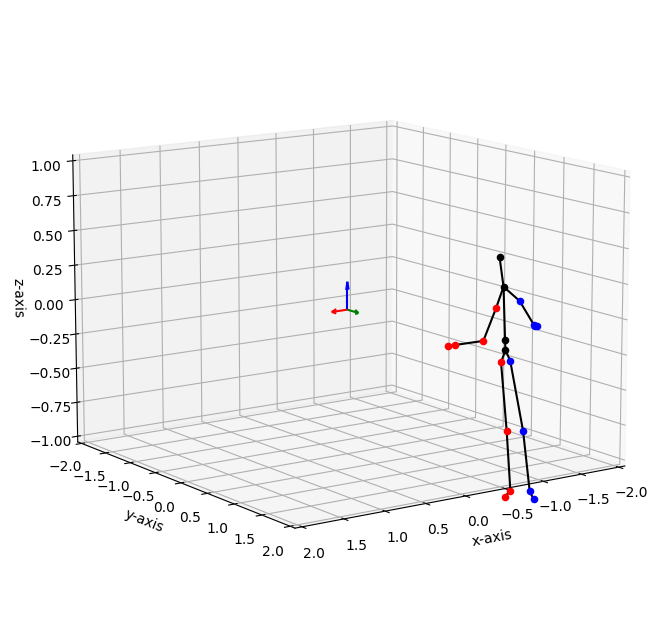

In [42]:
frame_idx = 0

# %matplotlib notebook

plt.ioff()
fig = plt.figure(figsize=(8,8))

elev= 12
azim = 55

ax = fig.add_subplot(projection='3d')
ax.view_init(elev,azim) #(elev = 위아래, azim = 좌우)
ax.set_xlim3d([-2, 2])
ax.set_ylim3d([-2, 2])
ax.set_zlim3d([-1, 1])

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

ax.quiver(0,0,0,0.2,0,0, color='r') #x-axis , label = 'x'
ax.quiver(0,0,0,0,0.2,0, color='g') #y-axis , label = 'y'
ax.quiver(0,0,0,0,0,0.2, color='b') #z-axis , label = 'z'

for bone in bones_3d:
    start = bone[0]
    end = bone[1]

    col = 'black' if bone[2] == 0 else 'black' #red = right, black = left

    x = [(test[frame_idx][start*3]), (test[frame_idx][end*3])]
    y = [(test[frame_idx][(start*3)+1]), (test[frame_idx][(end*3)+1])]
    z = [(test[frame_idx][(start*3)+2]), (test[frame_idx][(end*3)+2])]

    ax.plot(x, y, z, c = col)

for i in range(20):
    if i in [4,5,6,7,12,13,14,15]: col = 'blue'
    elif i in [0,1,2,3]: col = 'k'
    else: col = 'r'
    x = test[frame_idx][i*3]
    y = test[frame_idx][i*3+1]
    z = test[frame_idx][i*3+2]
    
    ax.scatter3D(x, y, z, c=col)

plt.show()

# plt.axis('off')
# plt.grid(b=None)
# plt.savefig('./221226_fig_eg_v1.png',bbox_inches='tight')